# Introduction to NetworkX

NetworkX is the most populr python library to work with graphs. 

- Home:
https://networkx.org/
- Documentation:
https://networkx.org/documentation/stable/

In [ ]:
# Install networkx and extra packages, if needed.
# !pip install nx
# !pip install graphviz 
# !pip install pydot 

In [ ]:
## This one requires compiling C code and might fail.
# !pip install pygraphviz 

In [1]:
import networkx as nx

### Example 1: Creating and Growing a Graph

__a)__ Creation of an empty graph

In [2]:
# Undirected network.
G = nx.Graph()

# Directed network.
G1 = nx.DiGraph()

__b)__ Adding Nodes

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object,
another Graph, a customized node object, etc.


In [3]:
# Add a single node.
G.add_node(1)
print(G.nodes())

[1]


In [4]:
# add nodes from list
G.add_nodes_from([2, 3])
G1.add_nodes_from([2, 3])

print(G.nodes())
print(G1.nodes())

[1, 2, 3]
[2, 3]


We can add nodes from other graphs. Let's create a simple "path graph". What is a path graph?
https://en.wikipedia.org/wiki/Path_graph

In [8]:
# Create path graph.
H = nx.path_graph(10)
print(H.nodes())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


How do I know the parameters for `path_graph()` ? Check the doc:\
https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html

In [9]:
# Add nodes from the path graph we just created.
G.add_nodes_from(H)
print(G.nodes())

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]


__c)__ Adding Edges

In [10]:
# Add edges one at a time.
G.add_edge(1, 2)
G.add_edge(2, 1)

G1.add_edge(2, 1)
G1.add_edge(1, 2)

print(G.edges())
print(G1.edges())

[(1, 2)]
[(2, 1), (1, 2)]


In [11]:
# Add multiple edges from list.
G.add_edges_from([(2, 5), (4, 6)])

In [13]:
# Add edges from another graph.
print(H.edges())

G.add_edges_from(H.edges)
print(G.edges())

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(1, 2), (1, 0), (2, 5), (2, 3), (3, 4), (4, 6), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


### Example 2: Analysing Graphs

__a)__ Connected Components

In [ ]:
# Build a second connected component. 
G.add_edges_from([(10,11),(11,12),(10,12)])

list(nx.connected_components(G))

Can we add edges before the nodes even exist?\
https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html

In [17]:
G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 10, 11, 12))

__b)__ Node Degrees

In [18]:
# degree of all nodes 
print(G.degree())

# degree of a certain node
G.degree(3)

[(1, 2), (2, 3), (3, 2), (0, 1), (4, 3), (5, 3), (6, 3), (7, 2), (8, 2), (9, 1), (10, 2), (11, 2), (12, 2)]


2

### Example 3: Drawing a Graph

In [25]:
import matplotlib.pyplot as plt

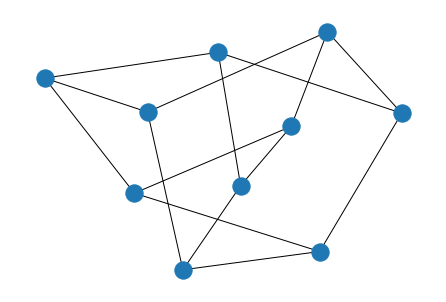

In [26]:
G = nx.petersen_graph()

nx.draw(G)
# plt.show() ## needed outside Jupyter.

_Note_: in VS Code you can check the source code of `petersen_graph()` and other methods by hovering over the method name, pressing CTRL- and clicking on it.

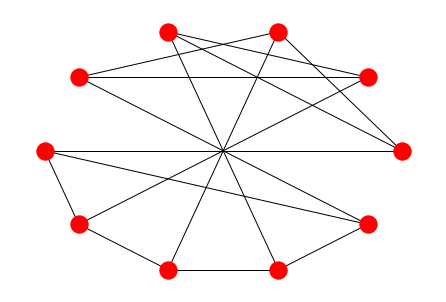

In [32]:
# Let's try out a different layout.
nx.draw_shell(G, node_color = "red")
# plt.show() ## needed outside Jupyter.

### Task 0: Load a network file

In the following tasks we are going to investigate a network of jazz musicians, where each node represents a musician, and a connection is drawn if they have colaborated.

Refresh your notebook, and execute the cell below to load the jazz musician network.

In [14]:
G = nx.read_edgelist('jazz.txt', nodetype=int)

Note that in all the following tasks, you should try to use functions from the networkX package wherever possible.

### Task 1: Basic statistics

__a)__ Print the number of nodes in G!

In [33]:
print(G.number_of_nodes())
# or
print(nx.number_of_nodes(G))

10
10


__b)__ Print the number of edges in G!

In [16]:
G.number_of_edges()

2742

__c)__ Give the density of the network!

In [17]:
nx.density(G)

0.14059375480695277

__d)__ Get the node ID and the degree of the node with the highest degree in the network!

In [18]:
# degree of all nodes in a dict
D = dict(G.degree)
max_id = max(D, key=D.get) 
max_degree = D[max_id]
    
print(max_id)
print(max_degree)

# check if there are more nodes that have this degree
max_id_list = [key for key, value in D.items() if value == max_degree]
print(max_id_list)


135
100
[135]


### Task 2: Further Statistics

__a)__	 How many connected components does the network consist of?

In [19]:
nx.number_connected_components(G)

1

__b)__ What is the diameter of the network?

In [20]:
nx.diameter(G)    

6

__c)__ Compute the average distance between nodes!


In [21]:
nx.average_shortest_path_length(G)

2.2350407629595446

__d)__	What is the shortest path from node 1 to node 10: Give the length and the node IDs it traverses!

In [22]:
sp = nx.shortest_path(G, source=1, target=10)
print("Shortest path: " + str(sp))

# path length is the number of edges it takes --> number of nodes in path - 1
print("Shortest path length: " + str(len(sp)-1))

# alternative way to determine length only: 
print(nx.shortest_path_length(G, source = 1, target = 10))

# actually there are many shortest paths, list all of them via:
print(list(nx.all_shortest_paths(G, source=1, target=10)))

Shortest path: [1, 13, 6, 10]
Shortest path length: 3
3
[[1, 13, 6, 10], [1, 149, 6, 10], [1, 13, 9, 10], [1, 13, 111, 10], [1, 149, 111, 10], [1, 13, 113, 10], [1, 13, 157, 10], [1, 53, 157, 10], [1, 149, 157, 10], [1, 13, 160, 10], [1, 53, 160, 10], [1, 149, 160, 10], [1, 13, 163, 10], [1, 53, 163, 10], [1, 149, 163, 10], [1, 53, 48, 10], [1, 149, 48, 10], [1, 53, 52, 10], [1, 149, 52, 10], [1, 53, 56, 10], [1, 53, 195, 10], [1, 149, 195, 10], [1, 149, 70, 10]]


### Task 3: Plotting the Graph

__a)__ Plot the network using a spring layout. For your own enjoyment: try to plot the network with different layouts.

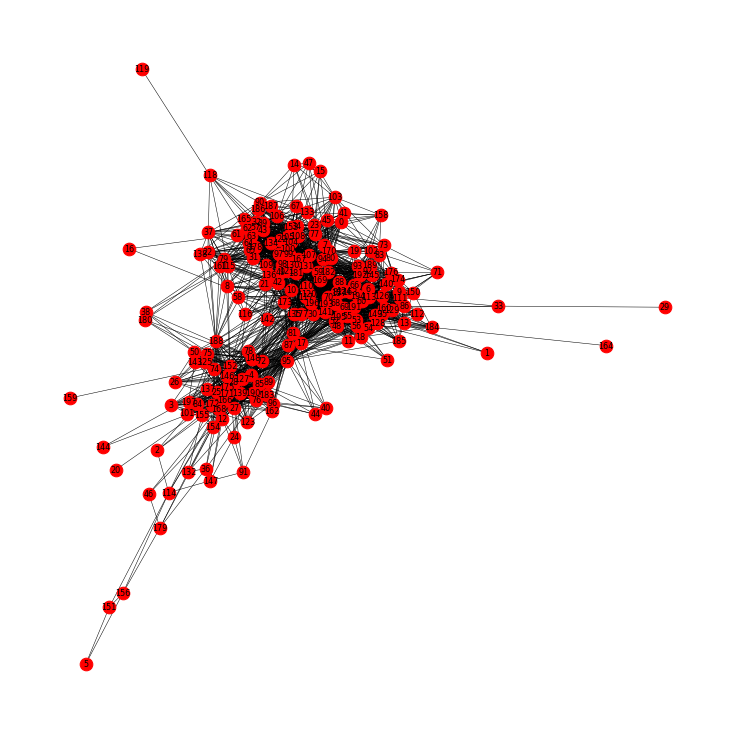

In [23]:
import matplotlib.pyplot as plt

# drawing parameters
options = {
    'with_labels': True,    # draw labels
    'node_size': 160,       # size of the nodes (fixed or array)
    'node_color': 'red',    # color of the nodes (fixed or array)
    'width': 0.5,           # line width of the edges
    'font_size': 8          # font size for labels
}

# size of the plot
plt.figure(figsize=(10,10))

# layout determines the node positioning
pos = nx.spring_layout(G, seed=42)   

nx.draw(G, pos, **options)    # ** unpacks a dictionary into keyword arguments 

__b)__ Plot the nodes and edges of the shortest path in 2d) in green color!

In [24]:
# edges of shortest path
sp_edges = list(zip(sp[:-1], sp[1:]))    

print(sp_edges)

[(1, 13), (13, 6), (6, 10)]


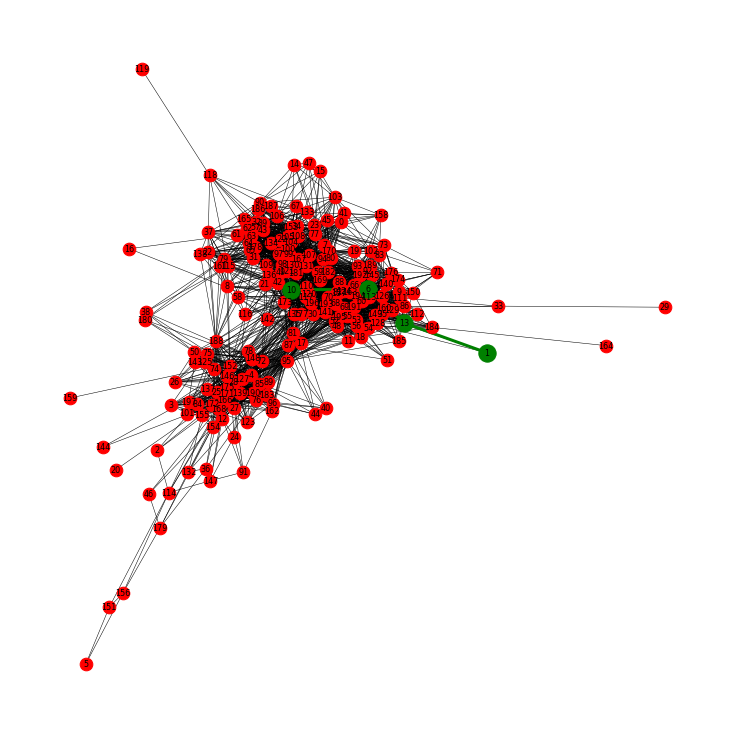

In [25]:
# draw graph regularly
plt.figure(figsize=(10,10))
nx.draw(G, pos, **options)

# draw only specified nodes in green
nx.draw_networkx_nodes(G, pos, nodelist=sp, node_color='green')
# draw only specified edges in green
nx.draw_networkx_edges(G, pos, edgelist=sp_edges, edge_color='green', width=3)

### Task 4: Embedded Edges

Compute the *embeddedness* of each edge, which is the number of neighbors that its constituent nodes have in common. For example: the friendship edge of Markus and Marlene has an embeddedness of 2 if Markus and Marlene have two friends in common. Remove all edges with an embeddedness less than or equal to 2 and plot the resulting network.

In [26]:
# compute embeddedness of each edge
D = {(u,v) : len(list(nx.common_neighbors(G,u,v))) for (u,v) in G.edges}
# print(D)

# get all edges with embededdness > 2
emb_edges = [key for key, value in D.items() if value > 2]


# alternative
emb_edges = [(u,v) for (u,v) in G.edges if sum(1 for _ in nx.common_neighbors(G,u,v)) > 2]


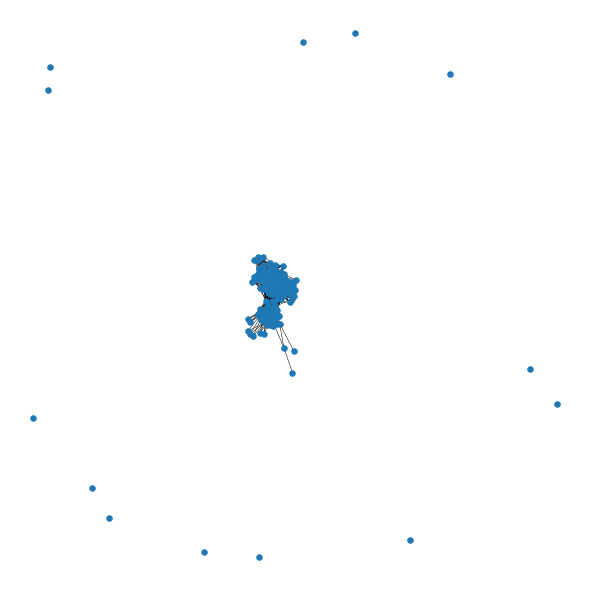

In [27]:
# plot the resulting network
H = nx.Graph()
H.add_nodes_from(G)            # add all nodes from G
H.add_edges_from(emb_edges)    # add only the specified edges

# drawing parameters
options = {
    'node_size': 30,       
    'width': 0.5,           
}

plt.figure(figsize=(8,8))
pos = nx.spring_layout(H)
nx.draw(H, pos, **options)